In [40]:
import torch
from torch import nn

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [41]:
weight = 0.7
bias = -1

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, label='Training Data', c='b', s=4)
  plt.scatter(test_data, test_labels, label='Testing Data', c='g', s=4)

  if predictions is not None:
    plt.scatter(test_data, predictions, label='Predictions', c='r', s=4)

  plt.legend(prop={'size': 14})

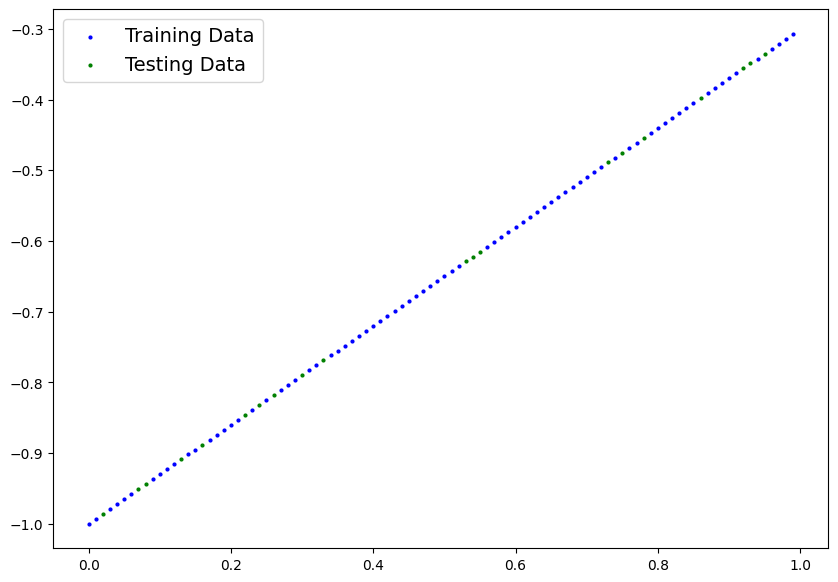

In [44]:
plot_predictions()

In [45]:
class LinearRegressionModel(nn.Module):

  def __init__(self, input_size):
    super().__init__()
    self.linear = nn.Linear(in_features=input_size,
                            out_features=1)

  def forward(self, x):
    return self.linear(x)

In [46]:
model = LinearRegressionModel(input_size=1)

In [47]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [48]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [49]:
model.linear.weight

Parameter containing:
tensor([[0.7645]], requires_grad=True)

In [50]:
model.linear.bias

Parameter containing:
tensor([0.8300], requires_grad=True)

In [51]:
with torch.inference_mode():
  y_preds = model(X_test)

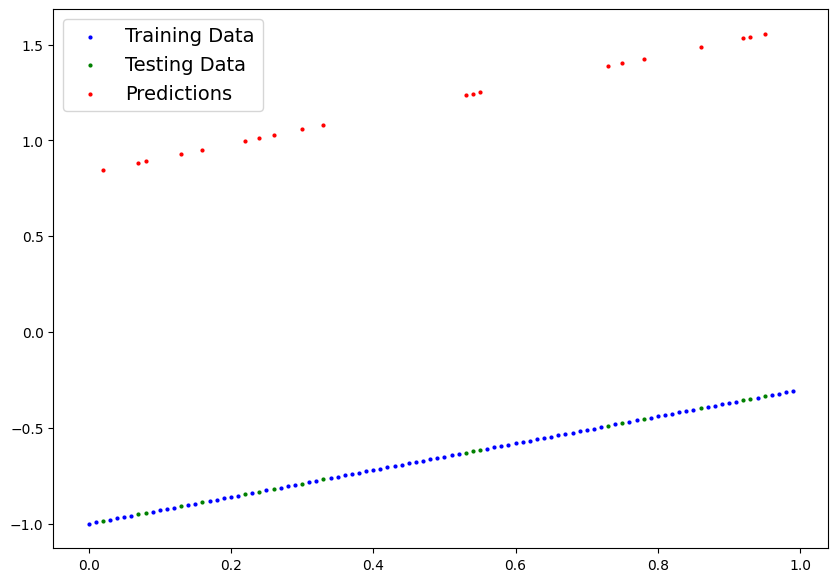

In [52]:
plot_predictions(predictions=y_preds)

In [53]:
y_test - y_preds

tensor([[-1.8468],
        [-1.8855],
        [-1.8313],
        [-1.8655],
        [-1.8784],
        [-1.8900],
        [-1.8403],
        [-1.8771],
        [-1.8649],
        [-1.8913],
        [-1.8642],
        [-1.8894],
        [-1.8803],
        [-1.8384],
        [-1.8345],
        [-1.8494],
        [-1.8442],
        [-1.8455],
        [-1.8513],
        [-1.8352]])

In [54]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=1e-2)

In [55]:
torch.manual_seed(42)

epochs = 10000

train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model.train()

  preds = model(X_train)
  loss = loss_fn(preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.inference_mode():
    test_preds = model(X_test)
    test_loss = loss_fn(test_preds, y_test)

    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())

    if epoch % 10 == 0:
      print(f'Epoch: {epoch + 1} | Train Loss: {loss.item()} | Test Loss: {test_loss.item()}')

Epoch: 1 | Train Loss: 1.8623981475830078 | Test Loss: 1.847833275794983
Epoch: 11 | Train Loss: 1.7372102737426758 | Test Loss: 1.7243705987930298
Epoch: 21 | Train Loss: 1.6120223999023438 | Test Loss: 1.6009080410003662
Epoch: 31 | Train Loss: 1.4868345260620117 | Test Loss: 1.4774454832077026
Epoch: 41 | Train Loss: 1.3616467714309692 | Test Loss: 1.35398268699646
Epoch: 51 | Train Loss: 1.2364587783813477 | Test Loss: 1.230520248413086
Epoch: 61 | Train Loss: 1.1112711429595947 | Test Loss: 1.1070574522018433
Epoch: 71 | Train Loss: 0.9860832095146179 | Test Loss: 0.9835948944091797
Epoch: 81 | Train Loss: 0.8608954548835754 | Test Loss: 0.8601323366165161
Epoch: 91 | Train Loss: 0.735707700252533 | Test Loss: 0.736669659614563
Epoch: 101 | Train Loss: 0.6105198264122009 | Test Loss: 0.6132069826126099
Epoch: 111 | Train Loss: 0.4853319525718689 | Test Loss: 0.4897443652153015
Epoch: 121 | Train Loss: 0.3601441979408264 | Test Loss: 0.36628180742263794
Epoch: 131 | Train Loss: 0.2

In [56]:
y_test.dtype

torch.float32

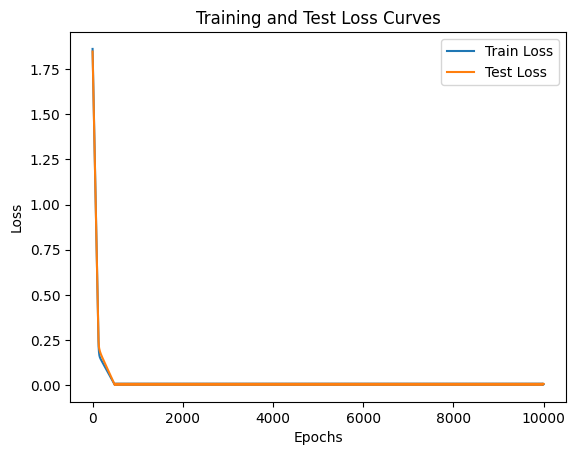

In [57]:
plt.plot(range(epochs), train_loss_values, label='Train Loss')
plt.plot(range(epochs), test_loss_values, label='Test Loss')
plt.title('Training and Test Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [58]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.6937]])),
             ('linear.bias', tensor([-1.0042]))])

In [59]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[-0.8239],
        [-0.4077],
        [-0.9904],
        [-0.6227],
        [-0.4840],
        [-0.3591],
        [-0.8933],
        [-0.4979],
        [-0.6297],
        [-0.3452],
        [-0.6366],
        [-0.3661],
        [-0.4632],
        [-0.9141],
        [-0.9557],
        [-0.7961],
        [-0.8516],
        [-0.8378],
        [-0.7753],
        [-0.9487]])

In [60]:
y_preds - y_test

tensor([[-0.0059],
        [-0.0097],
        [-0.0044],
        [-0.0077],
        [-0.0090],
        [-0.0101],
        [-0.0053],
        [-0.0089],
        [-0.0077],
        [-0.0102],
        [-0.0076],
        [-0.0101],
        [-0.0092],
        [-0.0051],
        [-0.0047],
        [-0.0061],
        [-0.0056],
        [-0.0058],
        [-0.0063],
        [-0.0047]])

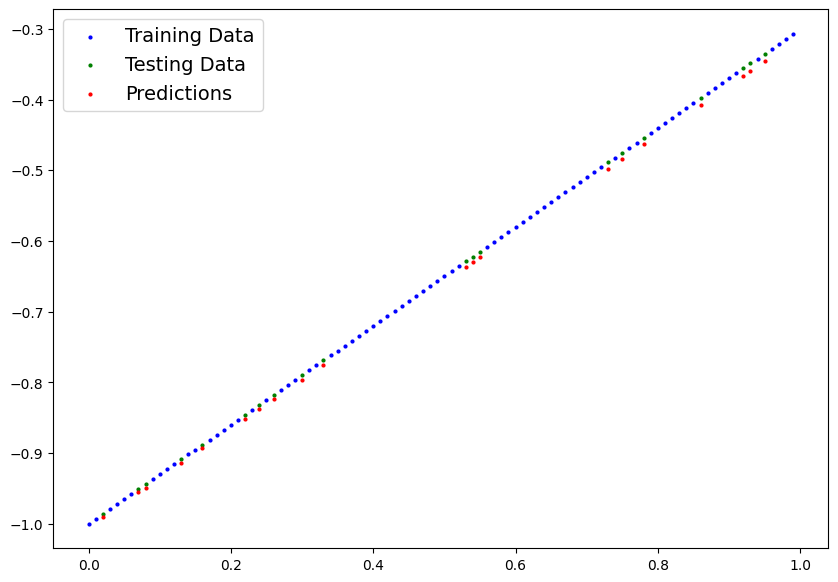

In [61]:
plot_predictions(predictions=y_preds)

## Saving the Model

In [62]:
from pathlib import Path

dir_path = Path('models')
dir_path.mkdir(parents=True, exist_ok=True)

file_name = 'linear_regression_10000_epochs.pth'
model_save_path = dir_path / file_name

torch.save(obj=model.state_dict(), f=model_save_path)

## Loading a Saved Model

In [64]:
model_0 = LinearRegressionModel(input_size=1)
model_0.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [65]:
model_0.state_dict()

OrderedDict([('linear.weight', tensor([[0.6937]])),
             ('linear.bias', tensor([-1.0042]))])